# Лабораторна робота 6
Виконав студент групи ФБ-35 Ворона Сергій

In [90]:
import numpy as np
import matplotlib.pyplot as plt

## Завдання 1

Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу
результатів.

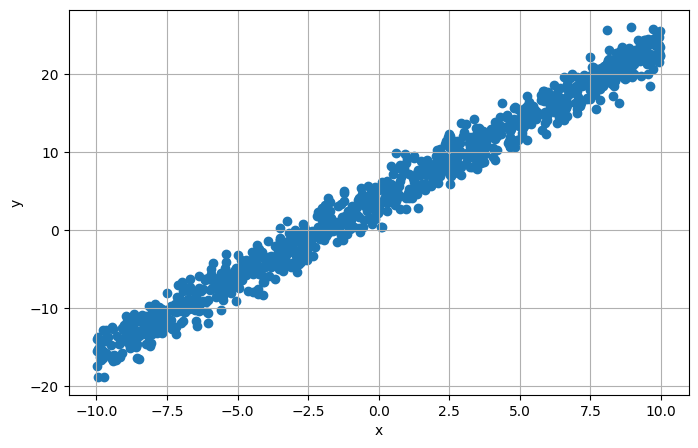

In [91]:
k = 2
b = 4

x = np.random.uniform(-10, 10, 1000)
noise = np.random.normal(loc=0, scale=1.5, size=1000)
y = k * x + b + noise

plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k^ та b^.

Оптимальна оцінка 
k: 1.9876 
b: 3.9632


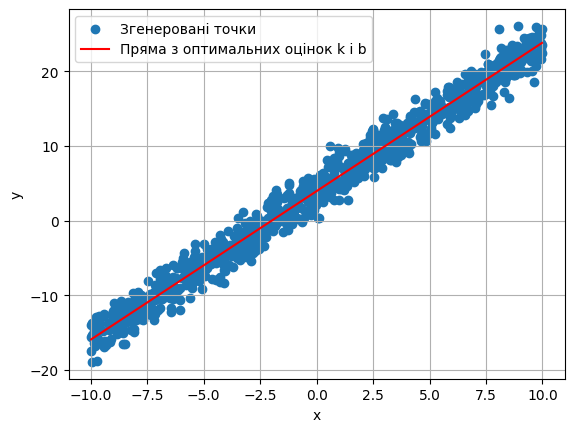

In [92]:
x_mean = np.mean(x)
y_mean = np.mean(y)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
k_manual = numerator / denominator
b_manual = y_mean - k * x_mean

print(f"Оптимальна оцінка \nk: {round(k_manual, 4)} \nb: {round(b_manual, 4)}")
plt.scatter(x, y, label='Згенеровані точки')
plt.plot(np.sort(x), k_manual * np.sort(x) + b_manual, color='red', label='Пряма з оптимальних оцінок k i b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

Оптимальна ручна оцінка 
k: 1.9876 
b: 3.9632
____________________________________
Оптимальна оцінка mp.polyfit 
k: 1.9876 
b: 3.9638
____________________________________
Початкові параметри прямої 
k: 2 
b: 4


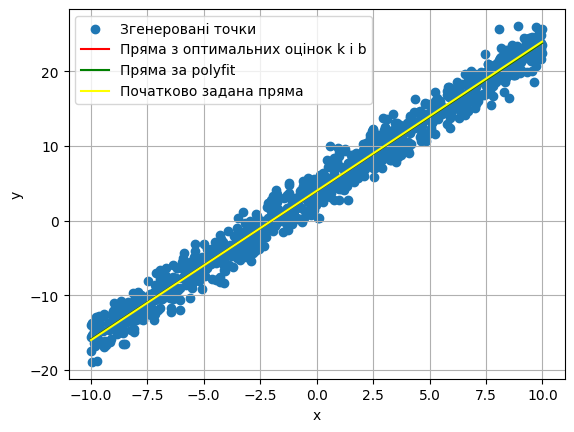

In [93]:
k_polyfit, b_polyfit = np.polyfit(x, y, 1)

print(f"Оптимальна ручна оцінка \nk: {round(k_manual, 4)} \nb: {round(b_manual, 4)}\n____________________________________")
print(f"Оптимальна оцінка mp.polyfit \nk: {round(k_polyfit, 4)} \nb: {round(b_polyfit, 4)}\n____________________________________")
print(f"Початкові параметри прямої \nk: {round(k, 4)} \nb: {round(b, 4)}")

plt.scatter(x, y, label='Згенеровані точки')
plt.plot(np.sort(x), k_manual * np.sort(x) + b_manual, color='red', label='Пряма з оптимальних оцінок k i b')
plt.plot(np.sort(x), k_polyfit * np.sort(x) + b_polyfit, color='green', label='Пряма за polyfit')
plt.plot(np.sort(x), k * np.sort(x) + b, color='yellow', label='Початково задана пряма')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

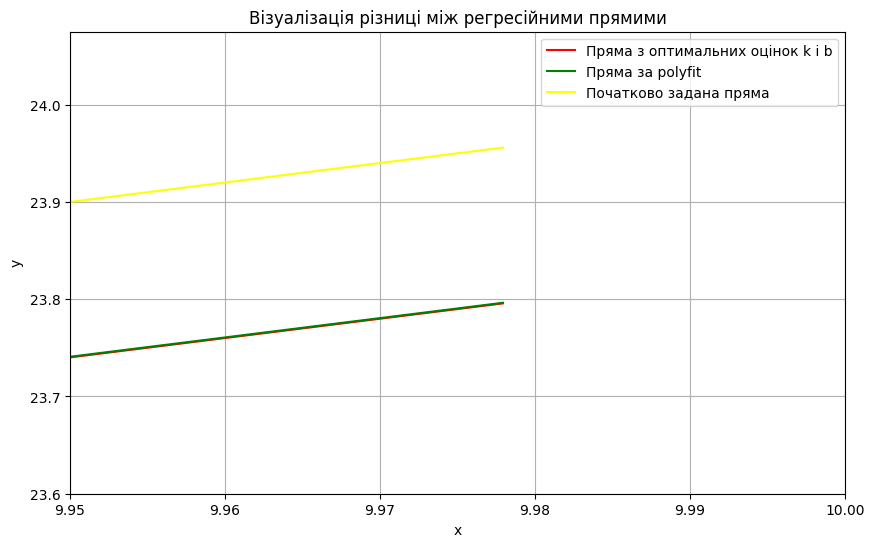

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(np.sort(x), k_manual * np.sort(x) + b_manual, color='red', label='Пряма з оптимальних оцінок k i b')
plt.plot(np.sort(x), k_polyfit * np.sort(x) + b_polyfit, color='green', label='Пряма за polyfit')
plt.plot(np.sort(x), k * np.sort(x) + b, color='yellow', label='Початково задана пряма')
plt.title("Візуалізація різниці між регресійними прямими")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(9.95, 10)
plt.ylim(23.6, 24.075)
plt.legend()
plt.grid(True)

## Завдання 2

Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k^ та b^. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

Оптимальна оцінка 
k: 1.9876 
b: 3.9638


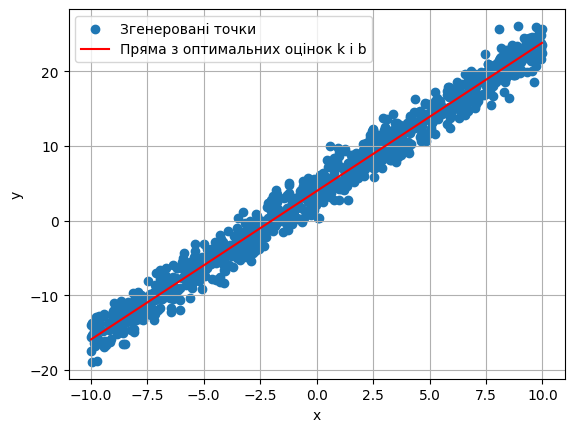

In [ ]:
learning_rate=0.01
n_iter=1000

k_gradient = 0
b_gradient = 0

for i in range(n_iter):
    y_pred = k_gradient * x + b_gradient

    error = y - y_pred

    dk = -2 * np.mean(x * error)
    db = -2 * np.mean(error)

    k_gradient -= learning_rate * dk
    b_gradient -= learning_rate * db

print(f"Оптимальна оцінка \nk: {round(k_gradient, 4)} \nb: {round(b_gradient, 4)}")
plt.scatter(x, y, label='Згенеровані точки')
plt.plot(np.sort(x), k_gradient * np.sort(x) + b_gradient, color='red', label='Пряма з оптимальних оцінок k i b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Додайте отриману лінію регресії на загальний графік

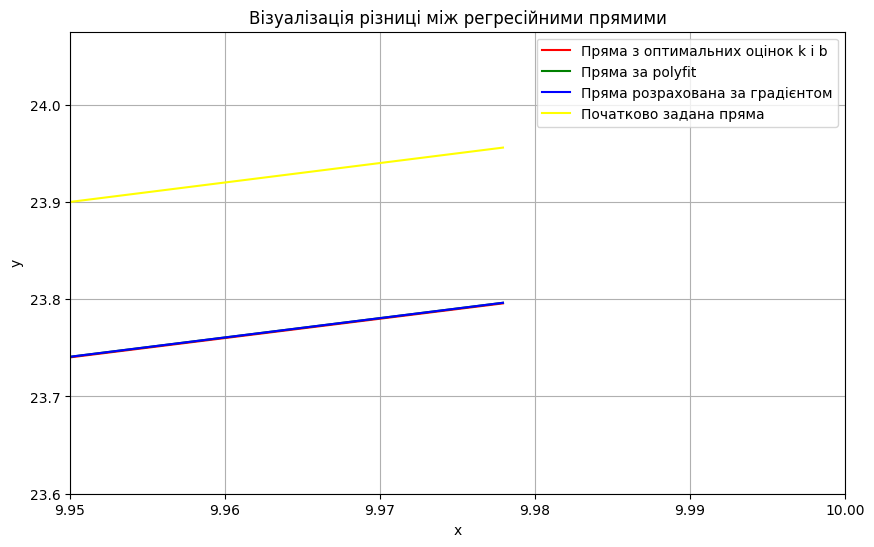

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(np.sort(x), k_manual * np.sort(x) + b_manual, color='red', label='Пряма з оптимальних оцінок k i b')
plt.plot(np.sort(x), k_polyfit * np.sort(x) + b_polyfit, color='green', label='Пряма за polyfit')
plt.plot(np.sort(x), k_polyfit * np.sort(x) + b_polyfit, color='blue', label='Пряма розрахована за градієнтом')
plt.plot(np.sort(x), k * np.sort(x) + b, color='yellow', label='Початково задана пряма')
plt.title("Візуалізація різниці між регресійними прямими")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(9.95, 10)
plt.ylim(23.6, 24.075)
plt.legend()
plt.grid(True)

Побудуйте графік похибки від кількості ітерацій, зробіть висновки

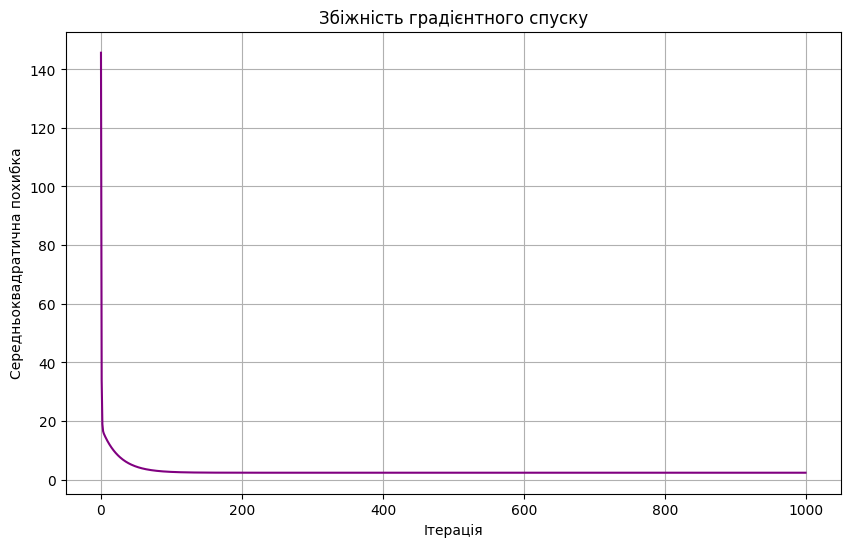

In [118]:
errors = []

k_gradient = 0
b_gradient = 0

for i in range(n_iter):
    y_pred = k_gradient * x + b_gradient
    error = y - y_pred

    mse = np.mean(error ** 2)
    errors.append(mse)

    db = -2 * np.mean(error)
    dk = -2 * np.mean(x * error)

    b_gradient -= learning_rate * db
    k_gradient -= learning_rate * dk


plt.figure(figsize=(10, 6))
plt.plot(errors, color='purple')
plt.title('Збіжність градієнтного спуску')
plt.xlabel('Ітерація')
plt.ylabel('Середньоквадратична похибка')
plt.grid(True)
plt.show()

Порівняйте отримані результати з результатами попереднього завдання:
Результат методу градієнтного спуску однаковий з використанням np.polyfit(x,y,1) і зовсім трохи точніше за ручну реалізацію методу найменших квадратів